# World Bank dataset about GDP growth

In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
from bs4 import BeautifulSoup as bs

In [3]:
#requesting the html page

url='https://databank.worldbank.org/id/31672bb7?Report_Name=GDP-growth-(annua-percentage)-1960---2020'

data=requests.get(url)

In [4]:
soup=bs(data.content)

In [5]:
links=soup.select('a')

In [6]:
#finding all the paragraph tags

soup.select('p')
    

[<p>Help us improve this section of the site. Can we get your feedback?             
                 <a class="btn-schedule" href="https://www.surveymonkey.com/r/ZFQKG5Y" target="_blank">Click here </a>
 </p>,
 <p class="noVariableTxt">No variables selected</p>,
 <p class="noVariableTxt">No variables selected</p>,
 <p style="display: none">
 <em>Defines the methodologies to be used when deriving custom aggregates. These rules
                 apply only to custom country groups you have created! </em><a class="help" data-target="#aggregationRule" data-toggle="modal" href="#aggregationRule">Learn More »</a>
 </p>,
 <p id="lblSlider">
 <label class="normalFont" for="amount">Availability Range: Year</label>
 <b> [<span id="year"></span>]</b>
 </p>,
 <p class="noVariableTxt">
                                                 No variables selected</p>,
 <p class="sortable-orientation-p">Drag to rearrange the order</p>,
 <p class="mT10"><b><em> Copy and paste this code to your website</em></

In [7]:
#finding all the href links in  "a" tags
links=soup.find_all('a')

for link in links:
    print(filter(link.has_attr('href'),links))
soup.find('href')


In [8]:
#finding the main row headers

row=soup.find_all('tr')

for ele in row:
    print(ele.get_text())



                                    Indicator
                                

                                    Rule
                                

                                    Weighted Indicator
                                

                                    %
                                



                                    All
                                


None
Mean
Median
Min
Sum




None








                                        Indicator
                                    

                                        Rule
                                    

                                        Weighted Indicator
                                    

                                        %
                                    



                                            Title
                                        






                                            Font Style
                                        


Bold
Bold Italic
I

In [9]:
#getting all the "a" tags

tags=soup.find_all('a')
for tag in tags:
    print(tag.get_text())

Click here 




English
Español
Français
عربي
中文

                    DataBank


 Table
 Chart
 Map
 Metadata


                            Download options

                                    Excel

                                    CSV

                                    Tabbed TXT

                                    Data on this page only - formatted

                                    Metadata

                                    Advanced options
Update

                                    Variables

                                    Layout

                                    Styles

                                    Save

                                    Share

                                    Embed


                Database

                            Available

                            Selected




 Filter 
 
Filter
 
Search


                Country
            
Available
Selected


Select all



Unselect all



Invert selection


Filter
                  

In [10]:
#getting the tables

table=soup.find_all('table')

In [11]:
#getting a table and itts rows

content_table=soup.find('table',{'class':'dxgvControl_GridDefaultTheme'})

rows=content_table.find_all('tr')
for row in rows:
    print(row.get_text())














1960



1961



1962



1963



1964



1965



1966



1967



1968



1969



1970



1971



1972



1973



1974



1975



1976



1977



1978



1979



1980



1981



1982



1983



1984



1985



1986



1987



1988



1989



1990



1991



1992



1993



1994



1995



1996



1997



1998



1999



2000



2001



2002



2003



2004



2005



2006



2007



2008



2009



2010



2011



2012



2013



2014



2015



2016



2017



2018



2019



2020










Afghanistan......................................................................................8.81.411.25.413.83.921.414.40.412.85.62.71.52.32.61.23.9-1.9

Albania..........................................5.72.91.1-1.31.85.6-0.8-1.49.8-9.6-28.0-7.29.68.313.39.1-10.98.812.97.08.34.55.55.55.55.96.07.53.43.72.51.41.01.82.23.33.84.12.2-3.3

Algeria..-13.6-19.734.35.86.2-4.89.510.88.48.9-11.327.43.87.55.08.45.39.27.50.83.06.45.45.63.70.4-0.7-1.04.40.8-1.21.8-2.1-0.93.84.11.15.13.23.83.05.6

In [12]:
import re
countries=content_table.find_all("a",title=re.compile('%Congo%'))
for country in countries:
    print(country.get_text())
print(countries)

[]


In [13]:
# reading the url using the pandas read_html

tables=pd.read_html('https://databank.worldbank.org/id/31672bb7?Report_Name=GDP-growth-(annua-percentage)-1960---2020')

In [14]:
len(tables)

70

In [15]:
for table in tables:
    print(table)

  Indicator                          Rule Weighted Indicator   %
0       All  None  Mean  Median  Min  Sum               None NaN
Empty DataFrame
Columns: [Indicator, Rule, Weighted Indicator, %]
Index: []
                      0                                  1          2  \
0                 Title                                NaN        NaN   
1            Font Style  Bold  Bold Italic  Italic  Normal  Font Type   
2            Font Color                                NaN  Font Size   
3  Horizontal Alignment       Justify  Left  Right  Center        NaN   

                                                   3  
0                                                NaN  
1  Open Sans  Arial Black  Arial  Comic Sans  Co...  
2                   8  9  10  11  12  13  14  15  16  
3                                                NaN  
                      0                                  1          2  \
0           Description                                NaN        NaN   
1      

In [52]:
#We have 70 tables and we can see that all the starting tables are just (2,2) matrices and thus we come from the back.
# table number 69 was our required table
tables[68].head()

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,Afghanistan,..,..,..,..,..,..,..,..,..,...,12.8,5.6,2.7,1.5,2.3,2.6,1.2,3.9,-1.9,NaN
1,Albania,..,..,..,..,..,..,..,..,..,...,1.4,1.0,1.8,2.2,3.3,3.8,4.1,2.2,-3.3,NaN
2,Algeria,..,-13.6,-19.7,34.3,5.8,6.2,-4.8,9.5,10.8,...,3.4,2.8,3.8,3.7,3.2,1.3,1.2,0.8,-5.5,NaN
3,American Samoa,..,..,..,..,..,..,..,..,..,...,-4.3,-2.5,1.8,3.1,-1.7,-7.0,3.3,-1.5,..,NaN
4,Andorra,..,..,..,..,..,..,..,..,..,...,-5.0,-3.5,2.5,1.4,3.7,0.3,1.6,2.0,-12.0,NaN


In [53]:
# we have found our header table
tables[5]

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,NaN,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,NaN


In [54]:
#merging the two dataframes using concat

main_table=pd.concat([tables[5],tables[68]])
main_table.head()

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,NaN,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,NaN
0,Afghanistan,..,..,..,..,..,..,..,..,..,...,12.8,5.6,2.7,1.5,2.3,2.6,1.2,3.9,-1.9,NaN
1,Albania,..,..,..,..,..,..,..,..,..,...,1.4,1.0,1.8,2.2,3.3,3.8,4.1,2.2,-3.3,NaN
2,Algeria,..,-13.6,-19.7,34.3,5.8,6.2,-4.8,9.5,10.8,...,3.4,2.8,3.8,3.7,3.2,1.3,1.2,0.8,-5.5,NaN
3,American Samoa,..,..,..,..,..,..,..,..,..,...,-4.3,-2.5,1.8,3.1,-1.7,-7.0,3.3,-1.5,..,NaN


In [55]:
#making the countries column as index
main_table.set_index(main_table[0],drop=True,inplace=True)

In [56]:
main_table.head()

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,,,,,,,,,,,,,,,,,,,,,
NaN,NaN,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,NaN
Afghanistan,Afghanistan,..,..,..,..,..,..,..,..,..,...,12.8,5.6,2.7,1.5,2.3,2.6,1.2,3.9,-1.9,NaN
Albania,Albania,..,..,..,..,..,..,..,..,..,...,1.4,1.0,1.8,2.2,3.3,3.8,4.1,2.2,-3.3,NaN
Algeria,Algeria,..,-13.6,-19.7,34.3,5.8,6.2,-4.8,9.5,10.8,...,3.4,2.8,3.8,3.7,3.2,1.3,1.2,0.8,-5.5,NaN
American Samoa,American Samoa,..,..,..,..,..,..,..,..,..,...,-4.3,-2.5,1.8,3.1,-1.7,-7.0,3.3,-1.5,..,NaN


In [209]:
main_table.columns=main_table.iloc[0]

In [210]:
main_table.head()

nan,NaN,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,NaN
0,,,,,,,,,,,,,,,,,,,,,
NaN,NaN,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.8,5.6,2.7,1.5,2.3,2.6,1.2,3.9,-1.9,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.4,1.0,1.8,2.2,3.3,3.8,4.1,2.2,-3.3,NaN
Algeria,NaN,NaN,-13.6,-19.7,34.3,5.8,6.2,-4.8,9.5,10.8,...,3.4,2.8,3.8,3.7,3.2,1.3,1.2,0.8,-5.5,NaN
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-4.3,-2.5,1.8,3.1,-1.7,-7.0,3.3,-1.5,NaN,NaN


In [211]:
main_table=main_table.apply(pd.to_numeric,errors='coerce')

In [212]:
main_table.head()

nan,NaN,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,NaN
0,,,,,,,,,,,,,,,,,,,,,
NaN,NaN,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.8,5.6,2.7,1.5,2.3,2.6,1.2,3.9,-1.9,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.4,1.0,1.8,2.2,3.3,3.8,4.1,2.2,-3.3,NaN
Algeria,NaN,NaN,-13.6,-19.7,34.3,5.8,6.2,-4.8,9.5,10.8,...,3.4,2.8,3.8,3.7,3.2,1.3,1.2,0.8,-5.5,NaN
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-4.3,-2.5,1.8,3.1,-1.7,-7.0,3.3,-1.5,NaN,NaN


In [213]:
table1=main_table[1:50]
table1.head()

nan,NaN,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,NaN
0,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.8,5.6,2.7,1.5,2.3,2.6,1.2,3.9,-1.9,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.4,1.0,1.8,2.2,3.3,3.8,4.1,2.2,-3.3,NaN
Algeria,NaN,NaN,-13.6,-19.7,34.3,5.8,6.2,-4.8,9.5,10.8,...,3.4,2.8,3.8,3.7,3.2,1.3,1.2,0.8,-5.5,NaN
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-4.3,-2.5,1.8,3.1,-1.7,-7.0,3.3,-1.5,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-5.0,-3.5,2.5,1.4,3.7,0.3,1.6,2.0,-12.0,NaN


In [214]:
table1 =table1.fillna(0)
table1.head()

nan,NaN,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,NaN
0,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.8,5.6,2.7,1.5,2.3,2.6,1.2,3.9,-1.9,0.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.4,1.0,1.8,2.2,3.3,3.8,4.1,2.2,-3.3,0.0
Algeria,0.0,0.0,-13.6,-19.7,34.3,5.8,6.2,-4.8,9.5,10.8,...,3.4,2.8,3.8,3.7,3.2,1.3,1.2,0.8,-5.5,0.0
American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-4.3,-2.5,1.8,3.1,-1.7,-7.0,3.3,-1.5,0.0,0.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.0,-3.5,2.5,1.4,3.7,0.3,1.6,2.0,-12.0,0.0


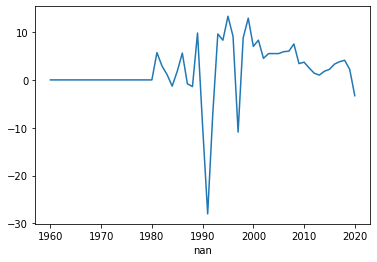

In [215]:
table1.loc['Albania'].plot()

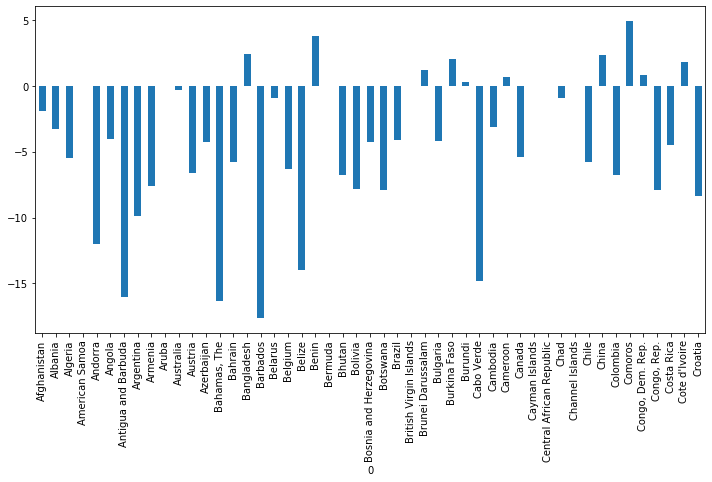

In [216]:
#plotting countries' gdp growth in 2020

table1[2020.0].plot(kind='bar',figsize=(12,6))

In [217]:
table1.columns.astype(str)

Index(['nan', '1960.0', '1961.0', '1962.0', '1963.0', '1964.0', '1965.0',
       '1966.0', '1967.0', '1968.0', '1969.0', '1970.0', '1971.0', '1972.0',
       '1973.0', '1974.0', '1975.0', '1976.0', '1977.0', '1978.0', '1979.0',
       '1980.0', '1981.0', '1982.0', '1983.0', '1984.0', '1985.0', '1986.0',
       '1987.0', '1988.0', '1989.0', '1990.0', '1991.0', '1992.0', '1993.0',
       '1994.0', '1995.0', '1996.0', '1997.0', '1998.0', '1999.0', '2000.0',
       '2001.0', '2002.0', '2003.0', '2004.0', '2005.0', '2006.0', '2007.0',
       '2008.0', '2009.0', '2010.0', '2011.0', '2012.0', '2013.0', '2014.0',
       '2015.0', '2016.0', '2017.0', '2018.0', '2019.0', '2020.0', 'nan'],
      dtype='object', name=nan)

In [218]:
table1.dtypes

nan
NaN       float64
1960.0    float64
1961.0    float64
1962.0    float64
1963.0    float64
           ...   
2017.0    float64
2018.0    float64
2019.0    float64
2020.0    float64
NaN       float64
Length: 63, dtype: object

In [219]:
#changing the names of the columns

new_cols=np.arange(1959,2022)

In [220]:
table1.columns=new_cols

In [221]:
table1.head()

,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.8,5.6,2.7,1.5,2.3,2.6,1.2,3.9,-1.9,0.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.4,1.0,1.8,2.2,3.3,3.8,4.1,2.2,-3.3,0.0
Algeria,0.0,0.0,-13.6,-19.7,34.3,5.8,6.2,-4.8,9.5,10.8,...,3.4,2.8,3.8,3.7,3.2,1.3,1.2,0.8,-5.5,0.0
American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-4.3,-2.5,1.8,3.1,-1.7,-7.0,3.3,-1.5,0.0,0.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.0,-3.5,2.5,1.4,3.7,0.3,1.6,2.0,-12.0,0.0


In [222]:
table1.drop([1959,2021],axis=1,inplace=True)

In [223]:
table1.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.4,12.8,5.6,2.7,1.5,2.3,2.6,1.2,3.9,-1.9
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,1.4,1.0,1.8,2.2,3.3,3.8,4.1,2.2,-3.3
Algeria,0.0,-13.6,-19.7,34.3,5.8,6.2,-4.8,9.5,10.8,8.4,...,2.9,3.4,2.8,3.8,3.7,3.2,1.3,1.2,0.8,-5.5
American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-4.3,-2.5,1.8,3.1,-1.7,-7.0,3.3,-1.5,0.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-5.0,-3.5,2.5,1.4,3.7,0.3,1.6,2.0,-12.0


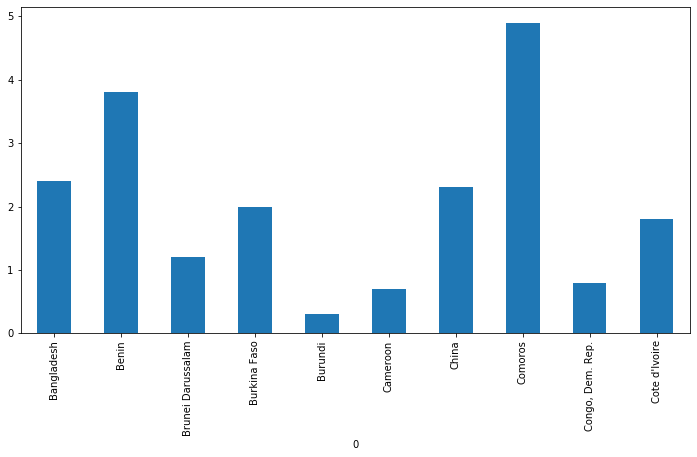

In [232]:
#plotting the countries with positive GDP growth in 2020
filt=table1[table1[2020]>0]
filt[2020].plot(kind='bar',figsize=(12,6))